In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

To build machine learning models on this dataset, we can start by pre-processing the text data in the "Sentence" column to convert the HTML code into plain text. We can then use various machine learning algorithms, such as logistic regression, decision trees, or neural networks, to classify each instance as either a cross-site scripting example or not.

For evaluating the performance of the models, we can use metrics such as accuracy, precision, recall, and F1 score. Additionally, we can create visualizations such as confusion matrices and ROC curves to better understand how the models are performing and where they may be making errors.

**Loading the data**

In [2]:
data = pd.read_csv('/kaggle/input/cross-site-scripting-xss-dataset-for-deep-learning/XSS_dataset.csv')
print(data)

       Unnamed: 0                                           Sentence  Label
0               0  <li><a href="/wiki/File:Socrates.png" class="i...      0
1               1               <tt onmouseover="alert(1)">test</tt>      1
2               2  \t </span> <span class="reference-text">Steeri...      0
3               3  \t </span> <span class="reference-text"><cite ...      0
4               4  \t </span>. <a href="/wiki/Digital_object_iden...      0
...           ...                                                ...    ...
13681       13681             <img onpointerenter=alert(1)>XSS</img>      1
13682       13682  <source onbeforepaste="alert(1)" contenteditab...      1
13683       13683  <div draggable="true" contenteditable>drag me<...      1
13684       13684  <li><cite id="CITEREFDomingos2015" class="cita...      0
13685       13685                                         \t </span>      0

[13686 rows x 3 columns]


**Converting HTML code to plain text**

In [3]:
data['Sentence'] = data['Sentence'].replace('<[^<]+?>', '', regex=True)
print(data)

       Unnamed: 0                                           Sentence  Label
0               0                           Philosophy&#32;portal         0
1               1                                               test      1
2               2  \t  Steering for the 1995 "No Hands Across Ame...      0
3               3  \t  "Miles Education | Future Of Finance | Blo...      0
4               4  \t . doi :10.1016/S0921-8890(05)80025-9 . Arch...      0
...           ...                                                ...    ...
13681       13681                                                XSS      1
13682       13682                                               test      1
13683       13683                                   drag medrop here      1
13684       13684  Domingos, Pedro  (2015). The Master Algorithm:...      0
13685       13685                                                \t       0

[13686 rows x 3 columns]


**Splitting the data into training and testing sets**

In [4]:
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

**Initializing the count vectorizer**

In [5]:
vectorizer = CountVectorizer(stop_words='english')

**Creating the feature matrix for the training data**

In [6]:
train_features = vectorizer.fit_transform(train_data['Sentence'])

**Fitting a logistic regression model to the training data**

In [7]:
model = LogisticRegression()
model.fit(train_features, train_data['Label'])

LogisticRegression()

**Creating the feature matrix for the testing data and Making predictions on the testing data**

In [8]:
test_features = vectorizer.transform(test_data['Sentence'])
preds = model.predict(test_features)

**Evaluating the model's accuracy**

In [9]:
accuracy = accuracy_score(test_data['Label'], preds)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8900657414170927


**Creating a confusion matrix**

Confusion Matrix:
[[1268    3]
 [ 298 1169]]


<AxesSubplot:>

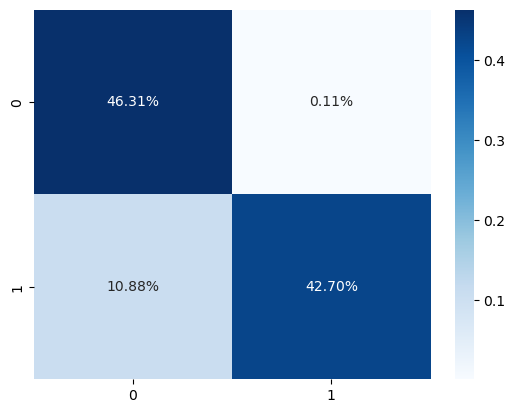

In [10]:
cm = confusion_matrix(test_data['Label'], preds)
print(f"Confusion Matrix:\n{cm}")
import numpy as np
import seaborn as sns
# sns.heatmap(cm, annot=True)
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

**Creating and Plotting an ROC curve**

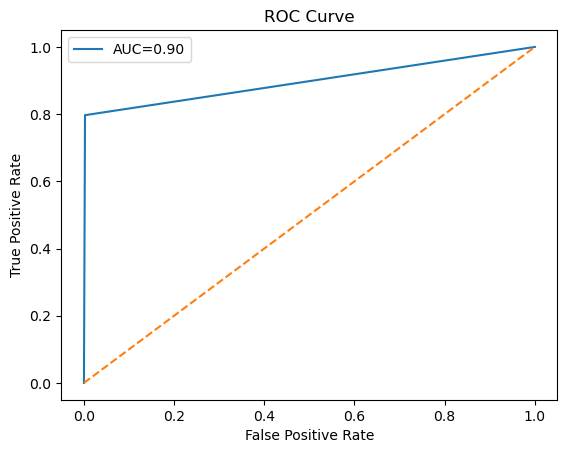

In [11]:
fpr, tpr, thresholds = roc_curve(test_data['Label'], preds)
auc = roc_auc_score(test_data['Label'], preds)

plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()